<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Basis Statistiek</h1>

<h2>Dobbelstenen</h2>

<div>
<img src='pics/dobbelsteen.jpg'/>    
</div>    

In [2]:
from dobbelsteen import Dobbelsteen
from matplotlib_venn import venn2
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import pylab as plt
import random
import seaborn as sns
import statistics as st

<h2>Dobbelsteen</h2>

In [3]:
d = Dobbelsteen()
print(d.show())

┌─────────┐
│  ●      │
│         │
│      ●  │
└─────────┘


<h3>Uitkomstruimte</h3>

In [4]:
print(d.values)  

{1, 2, 3, 4, 5, 6}


<h3>Kansmassa-functie</h3>

In [5]:
p = "1/6"
prob = {element:p for element in d.getList()}

for i in d.getList():
    print( f"p({i}) = {prob.get(i)}" )

p(1) = 1/6
p(2) = 1/6
p(3) = 1/6
p(4) = 1/6
p(5) = 1/6
p(6) = 1/6


<h2>Twee dobbelstenen</h2>

In [6]:
d0 = Dobbelsteen()
d1 = Dobbelsteen()
print( f"{d0.show()}\n{d1.show()}" )

┌─────────┐
│  ●   ●  │
│  ●   ●  │
│  ●   ●  │
└─────────┘
┌─────────┐
│  ●      │
│         │
│      ●  │
└─────────┘


<h3>Uitkomstruimte</h3>

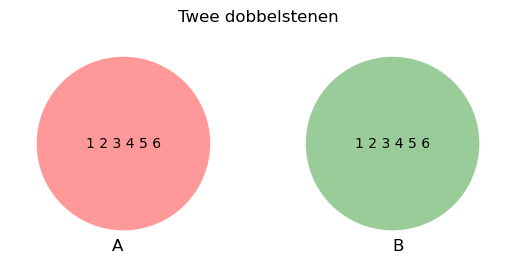

In [7]:
v = venn2(subsets=(1,1,0,1,0))
uitkomsten = "1 2 3 4 5 6"
v.get_label_by_id('100').set_text(uitkomsten)
v.get_label_by_id('010').set_text(uitkomsten)
plt.title("Twee dobbelstenen")
plt.show()

<h3>Exercise 1</h3>

<h4>Gegeven</h4>
<p>Dobbelstenen d0 en d1</p>

<h4>Gevraagd</h4>
<p>
    Maak een <u>set</u> van de <u>gecombineerde uitkomstruimte</u> <i>dice</i> die ontstaat door dobbelstenen d0 en d1 tegelijkertijd te werpen
</p>

<h4>Oplossing</h4>

In [8]:
# Oplossing 

possibilities = [(x,y) for x in d.values for y in d.values]
setOfPossibilities = set(possibilities)
print(setOfPossibilities)
print(type(setOfPossibilities))

{(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3)}
<class 'set'>


<h3>Exercise 2</h3>

<h4>Gegeven</h4>
<p>Dobbelstenen <i>d0</i> en <i>d1</i> en hun gecombineerde uitkomstruimte <i>dice</i></p>

<h3>Gevraagd</h3>
<p>
    Geef de <u>kansmassa-functie</u> van de som van het aantal ogen van <i>d0</i> en <i>d1</i><br>
    <strong>TIP</strong>: Maak eerst een dictionary met daarin per alle uitkomsten
</p>

<h4>Oplossing</h4>

In [9]:
# Oplossing

# teller van mogelijkheden
mass = {}

# optelsom van combinaties vanuit de mogelijkheden
sumOfpossibilities=list(map(sum, possibilities))
# print(sumOfpossibilities)

# telt de uitkomst mogelijkheden 
for numbers in sumOfpossibilities:
     if numbers not in mass:
         mass[numbers] = 0
     mass[numbers] += 1
print(mass)

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


In [10]:
# oplossing in 1/36

# teller van mogelijkheden
massOfChance = {}

# telt de uitkomst mogelijkheden 
for numbers in sumOfpossibilities:
     if numbers not in massOfChance:
         massOfChance[numbers] = 0 
     massOfChance[numbers] += 1/36
print(massOfChance)

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666669, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


<h3>Metrics</h3>

**Gebruik een numpy array voor het bepalen van centrum-maten**

<h3>Exercise 3a</h3>

<h4>Gegeven</h4>
<p>De class Dobbelsteen in de module dobbelsteen.py</p>

In [25]:
d2 = Dobbelsteen()
d3 = Dobbelsteen()
histD2 = np.empty(1000)
histD3 = np.empty(1000)

<h4>Gevraagd</h4>
<p>
    Voeg het volgende toe aan class Dobbelsteen:
    <ol>
        <li>list variabele <u>history</u> waaraan de uitkomst van iedere worp wordt toegevoegd</li>
        <li>methode <u>getHistory(self)</u> die de waarde van variabele <u>history</u> geeft als <u>numpy-array</u></li>
    <li>Schrijf in de cell hieronder een loop die 1000 keer zowel <i>d2</i> als <i>d3</i> werpt en sla de uitkomsten op in rescpectievelijk <i>histD2</i> en <i>histD3</i>. Maak daarbij gebruik van de methode <u>getHistory()</u> uit de vorige stap</li>
    </ol>
 </p>  

In [26]:
# Oplossing

for i in range(0,10000):
    d2.roll()
    d3.roll()
  

In [27]:
histD2 = d2.getHistory()
histD3 = d3.getHistory()
# print(type(histD2))
print(type(histD3))
# print(histD2)

<class 'numpy.ndarray'>


<h3>Exercise 3b</h3>

<h4>Gevraagd</h4>
<p>
    <ol>
        <li>Maak een <u>numpy array histD2D3</u> waarin de uitkomsten van <i>d2</i> en <i>d3</i> paarsgewijs bij elkaar zijn opgeteld.<br> <strong>Hint</strong>: <i>histD2D3 = np.add(histD2, histD3)</i></li> 
        <li>Print van de modus van zowel histD2 als histD3</li>
        <li>Vul onderstaande code aan een <u>histogram van histD2D3</u>.
    </ol>
 </p>  

In [28]:
histD2D3 = np.add(histD2, histD3)
# print(histD2D3)
# type(histD2D3)

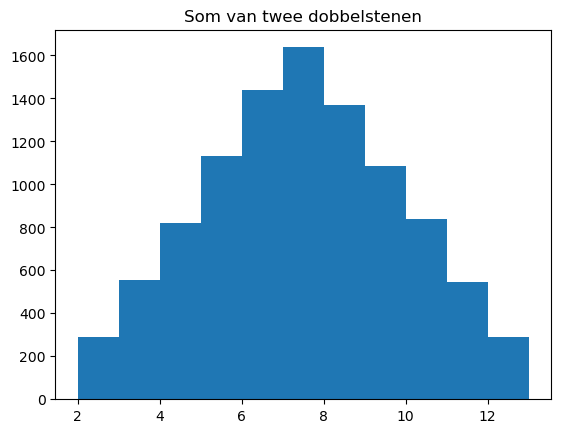

In [29]:
# Oplossing

uitkomsten = histD2D3

# Rechtermarge van 2 toegevoegd
bins = range(histD2D3.min(), histD2D3.max()+2)
plt.hist(uitkomsten, bins) 
plt.title("Som van twee dobbelstenen") 
plt.show()